NAIVE BAYES ALGORITHM (https://alok05.medium.com/na%C3%AFve-bayes-machine-learning-from-basics-to-advanced-algorithm-concepts-bcc4b585a6f9)

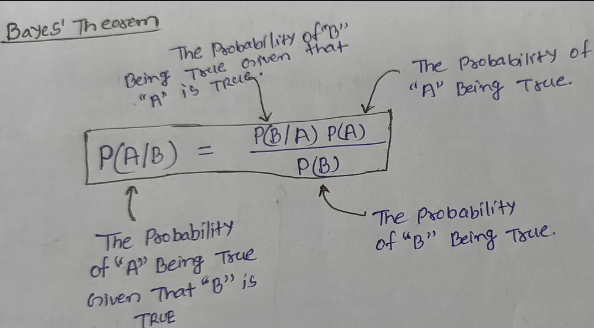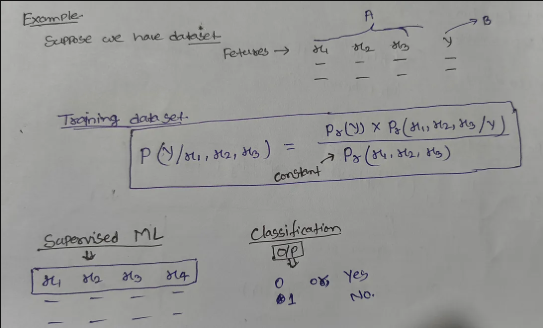

PYTHON IMPLEMENTATION FIRST

In [3]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import pandas as pd
data = pd.read_csv('news_labeled_dataset_II.csv')
data

id  label                                             titulo   
0      1      1  Em Irani, dois empresários denunciados pelo MP...  \
1      2      1  Com a morte de pai investigado por superfatura...   
2      3      1  Operação Caronte: Após pedido do MPSC, Municíp...   
3      4      1  Denúncia por fraude em obra de rua coberta é r...   
4      5      1  Denúncia da Operação Caronte é recebida e 21 i...   
..   ...    ...                                                ...   
295  296      0  Justiça intima vereador de Balneário Camboriú ...   
296  297      0  100 dias: gestão Juliana Pavan tropeça em erro...   
297  298      0  Prefeita sanciona lei que muda nomes de vias, ...   
298  299      0  Prazo do imposto de renda 2024 está chegando: ...   
299  300      0  Prefeitura embarga no obra do Centro de Desenv...   

           data                                      texto_noticia   
0     28/2/2025  Em Irani, dois empresários denunciados pelo MP...  \
1     29/1/2025  Com a morte de pai investigado por superfatura...   
2    19/12/2024  Operação Caronte: Após pedido do MPSC, Municíp...   
3    17/12/2024  Denúncia por fraude em obra de rua coberta é r...   
4    14/11/2024  Denúncia da Operação Caronte é recebida e 21 i...   
..          ...                                                ...   
295    9/4/2025  Justiça intima vereador de Balneário Camboriú ...   
296   10/5/2025  100 dias: gestão Juliana Pavan tropeça em erro...   
297   15/4/2025  Prefeita sanciona lei que muda nomes de vias, ...   
298   12/4/2025  Prazo do imposto de renda 2024 está chegando: ...   
299   15/4/2025  Prefeitura embarga no obra do Centro de Desenv...   

                                          link_noticia  
0    https://www.mpsc.mp.br/noticias/em-irani-dois-...  
1    https://www.mpsc.mp.br/noticias/com-a-morte-de...  
2    https://www.mpsc.mp.br/noticias/operacao-caron...  
3    https://www.mpsc.mp.br/noticias/denuncia-por-f...  
4    https://www.mpsc.mp.br/noticias/denuncia-da-op...  
..                                                 ...  
295  https://www.clickcamboriu.com.br/politica/2025...  
296  https://www.clickcamboriu.com.br/blogs/olho-cr...  
297  https://www.clickcamboriu.com.br/geral/2025/04...  
298  https://www.clickcamboriu.com.br/geral/economi...  
299  https://www.clickcamboriu.com.br/geral/obras/2...  

[300 rows x 6 columns]

In [19]:
import re # regular expressions to handle with text patterns
import string # to help with cleaning punctuiations

from sklearn.feature_extraction.text import TfidfVectorizer # convert text into numeric values
from sklearn.model_selection import train_test_split # training and test samples
from sklearn.naive_bayes import MultinomialNB # sutable for text classification
from sklearn.model_selection import GridSearchCV # find the bests hyperparameters
from sklearn.metrics import accuracy_score # to evaluate how accurate the predictions are 
from nltk.corpus import stopwords # stopwords in portuguese


def read_data(file_name):
    # Load the dataset with comma delimimiter
    data = pd.read_csv(file_name, delimiter=',')
    return data

def clean_text(text):
    text = str(text).lower() #converts everything into string, then into lowercase
    text = re.sub(f'[{string.punctuation}]', '', text) # "replace(pattern, replacement, original_text)" - removes all string ponctuations using regex
    text = re.sub(r'\s+', ' ', text).strip() # raw string r' '; whitespace \s; one or more times +; replace them with one single space ' '; in text; also, remove spaces at beginning or and of the text .strip(). 
    return text # returns the clean text in: lowercase + without punctuations + without multiple withespaces

def preprocess_text_data(data, custom_stopwords=None):
    
    data['full_text'] = data['titulo'].fillna('') + ' ' + data['texto_noticia'].fillna('') 
    # creates a new colum where it join the 'title' and 'text' columns from the dataset together (also cleans any possible NaN value by replacing it for a empty string ''
    data['full_text'] = data['full_text'].apply(clean_text)
    
    stop_words_pt = stopwords.words('portuguese')

    vectorizer = TfidfVectorizer(stop_words = stop_words_pt, max_features=1000)
    X = vectorizer.fit_transform(data['full_text']) # [fit: learn from data / transform: convert data into numbers] result - matrix of numbers ready to train the model
    Y = data['label'].fillna('')
    return X, Y, vectorizer
    
def split_data(X, Y): 
    # 0.8 train / 0.2 test
    x_train, x_test, y_train, y_test = train_test_split(
    # Spliting with the labels (0 and 1) / using strtify 
        X,
        Y,
        train_size = 0.8,
        random_state = 42,
        stratify = Y
    )

    return x_train, x_test, y_train, y_test
    
def fit_model_NB(x_train, y_train):
    # “These 240 news articles are labeled: some are about fraud, others are not. 
    # learn to distinguish between them, using the words/features they contain.”

    # Implement NAIVE BAYES classifier
    nb = MultinomialNB()
    nb.fit(x_train, y_train)

    # Predict on the train set (evaluate how well the training data was memorized)
    preds_in_train = nb.predict(x_train)

    #calculate the accuracy of preds on the train data
    train_accuracy = accuracy_score(y_train, preds_in_train)

    return train_accuracy, nb

In [20]:
#Run the Flow
from sklearn.model_selection import GridSearchCV 
# read the data
data = pd.read_csv('news_labeled_dataset_II.csv')

# convert text into numbers
X, Y, vectorizer = preprocess_text_data(data)

# split the data (80/20)
x_trainval, x_test, y_trainval, y_test = split_data(X, Y)

# split the data again, now, the train data for validation(70/30) (divisão adicional entre treino e validação)
x_train, x_val, y_train, y_val = train_test_split(
    x_trainval,
    y_trainval,
    train_size = 0.7,
    random_state = 42,
    stratify = y_trainval
)

print("Best parameters: ", grid.best_params_)
print("Validation accuracy", grid.best_score_)
print('\n')

# fit on train data
train_accuracy, nb_model = fit_model_NB(x_train, y_train)
print(f'Naive Bayes accuracy on train data: {train_accuracy}')

clas_preds = nb_model.predict(x_val) # classification predictions
val_accuracy = accuracy_score(y_val, clas_preds) # compares the predicts with the original values to see the accuracy
print(f'Validation accuracy: {val_accuracy}')

Naive Bayes accuracy on train data: 0.9880952380952381
Validation accuracy: 0.7638888888888888


In [27]:
#Run the Flow
from sklearn.model_selection import GridSearchCV 
# read the data
data = pd.read_csv('news_labeled_dataset_II.csv')

# convert text into numbers
X, Y, vectorizer = preprocess_text_data(data)

# split the data (80/20)
x_trainval, x_test, y_trainval, y_test = split_data(X, Y)

# split the data again, now, the train data for validation(70/30) (divisão adicional entre treino e validação)
x_train, x_val, y_train, y_val = train_test_split(
    x_trainval,
    y_trainval,
    train_size = 0.7,
    random_state = 42,
    stratify = y_trainval
)

smoothness = list(np.arange(0.1, 2, 0.1))
# find the best hypearparameters
params = {'alpha': smoothness}

grid = GridSearchCV(MultinomialNB(), params, cv=5)  #try to find the best hyperparameter
grid.fit(x_train, y_train)

print("Best parameters: ", grid.best_params_)
print("Validation accuracy", grid.best_score_)
print('\n')

# fit on train data
train_accuracy, nb_model = fit_model_NB(x_train, y_train)
print(f'Naive Bayes accuracy on train data: {train_accuracy}')

clas_preds = nb_model.predict(x_val) # classification predictions
val_accuracy = accuracy_score(y_val, clas_preds) # compares the predicts with the original values to see the accuracy
print(f'Validation accuracy: {val_accuracy}')

Best parameters:  {'alpha': 0.1}
Validation accuracy 0.9700534759358289


Naive Bayes accuracy on train data: 0.9880952380952381
Validation accuracy: 0.7638888888888888
